In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv")

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df.fillna(0, inplace=True)

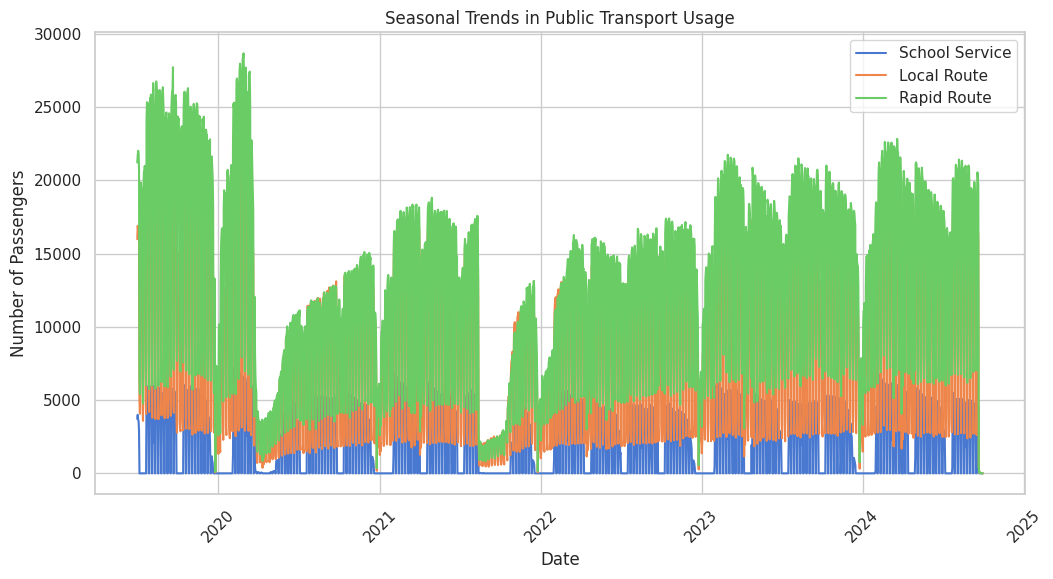

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='School', label='School Service')
sns.lineplot(data=df, x='Date', y='Local Route', label='Local Route')
sns.lineplot(data=df, x='Date', y='Rapid Route', label='Rapid Route')
plt.title("Seasonal Trends in Public Transport Usage")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.legend()
plt.show()

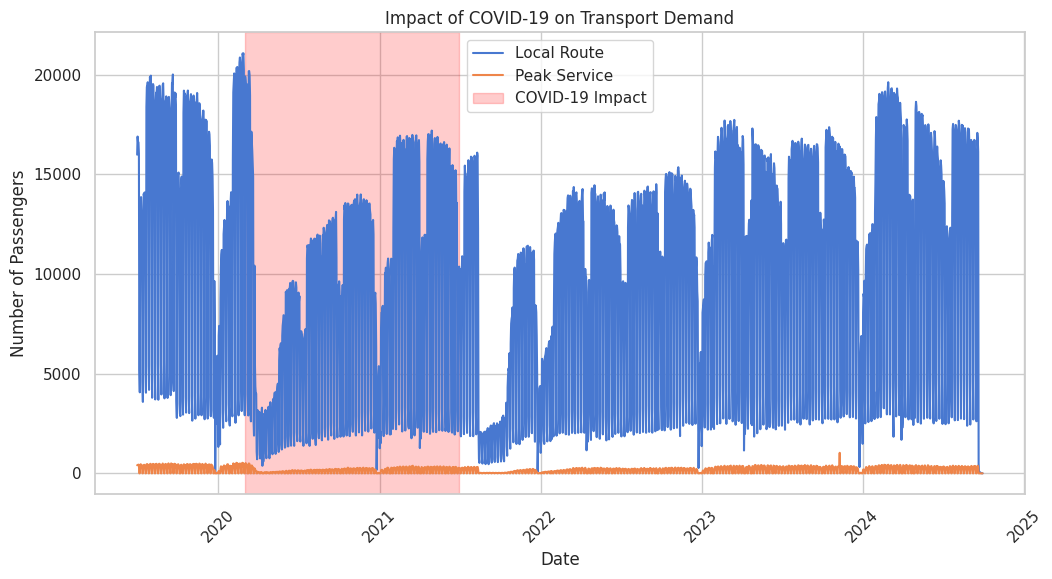

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Local Route', label='Local Route')
sns.lineplot(data=df, x='Date', y='Peak Service', label='Peak Service')
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2021-06-30'), color='red', alpha=0.2, label="COVID-19 Impact")
plt.title("Impact of COVID-19 on Transport Demand")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.legend()
plt.show()

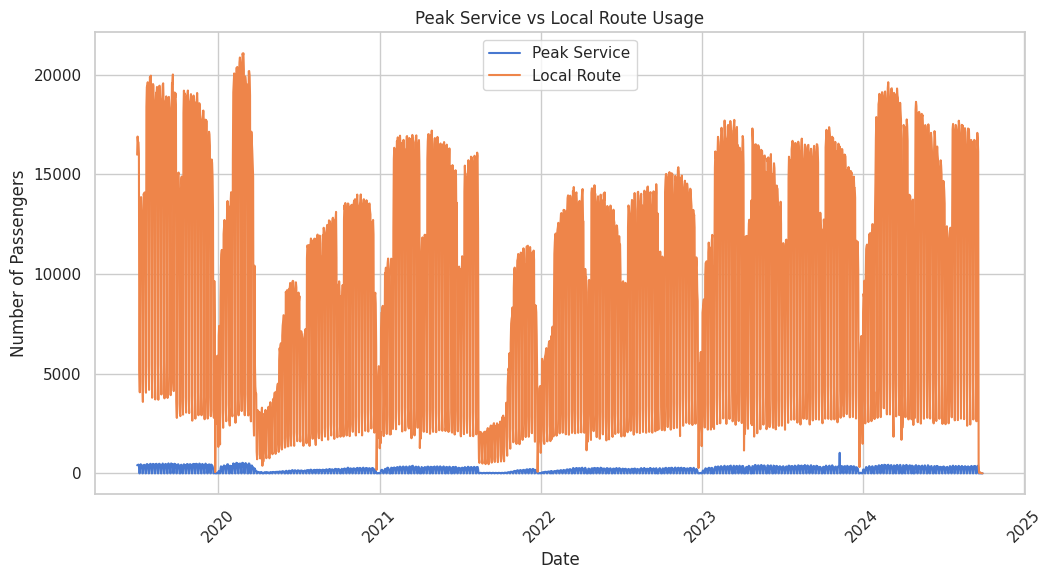

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Peak Service', label='Peak Service')
sns.lineplot(data=df, x='Date', y='Local Route', label='Local Route')
plt.title("Peak Service vs Local Route Usage")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.legend()
plt.show()

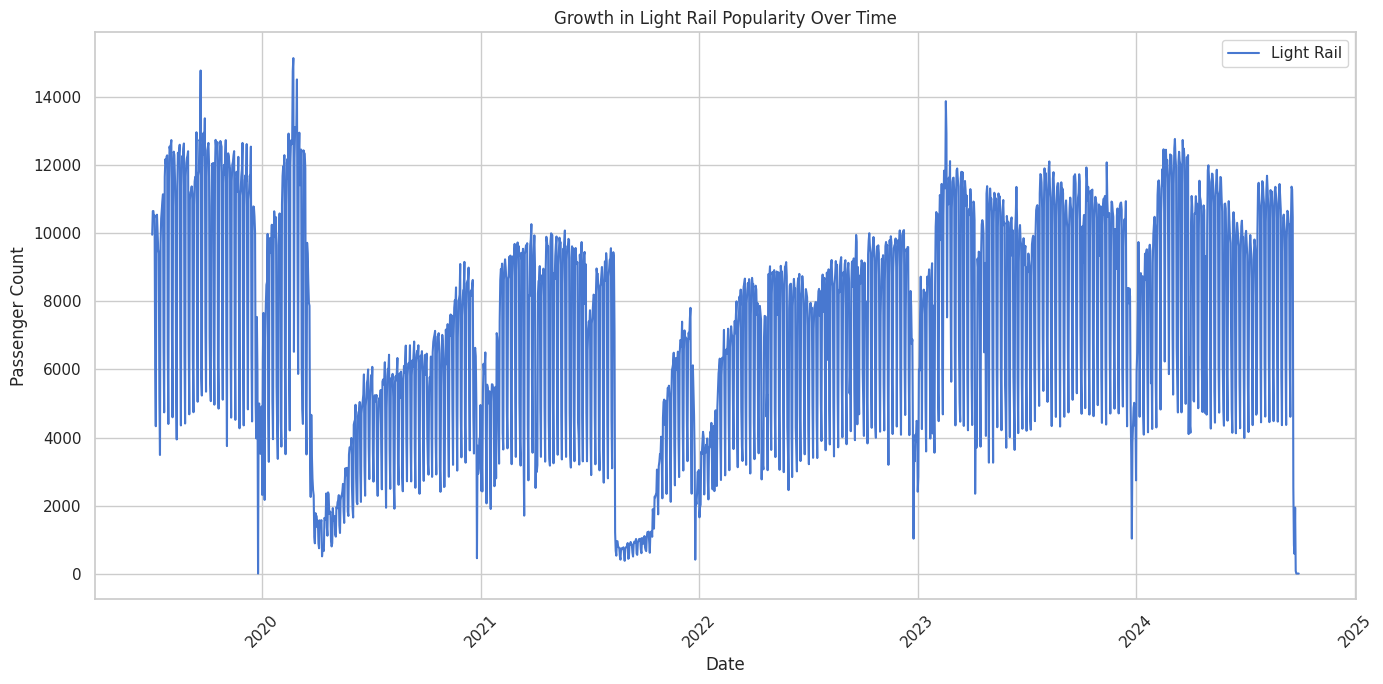

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='Light Rail', label='Light Rail')
plt.title("Growth in Light Rail Popularity Over Time")
plt.ylabel("Passenger Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

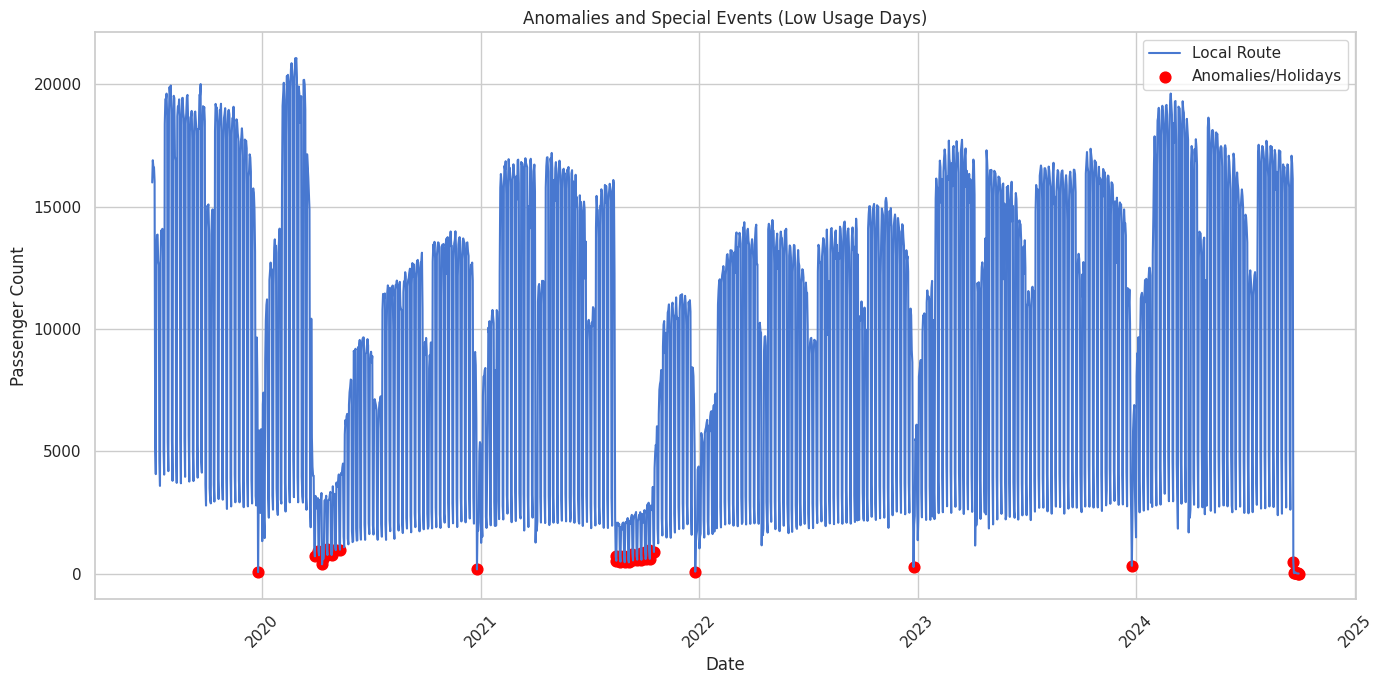

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='Local Route', label='Local Route')
anomalies = df[df['Local Route'] < 1000]
plt.scatter(anomalies['Date'], anomalies['Local Route'], color='red', label='Anomalies/Holidays', s=60)
plt.title("Anomalies and Special Events (Low Usage Days)")
plt.ylabel("Passenger Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

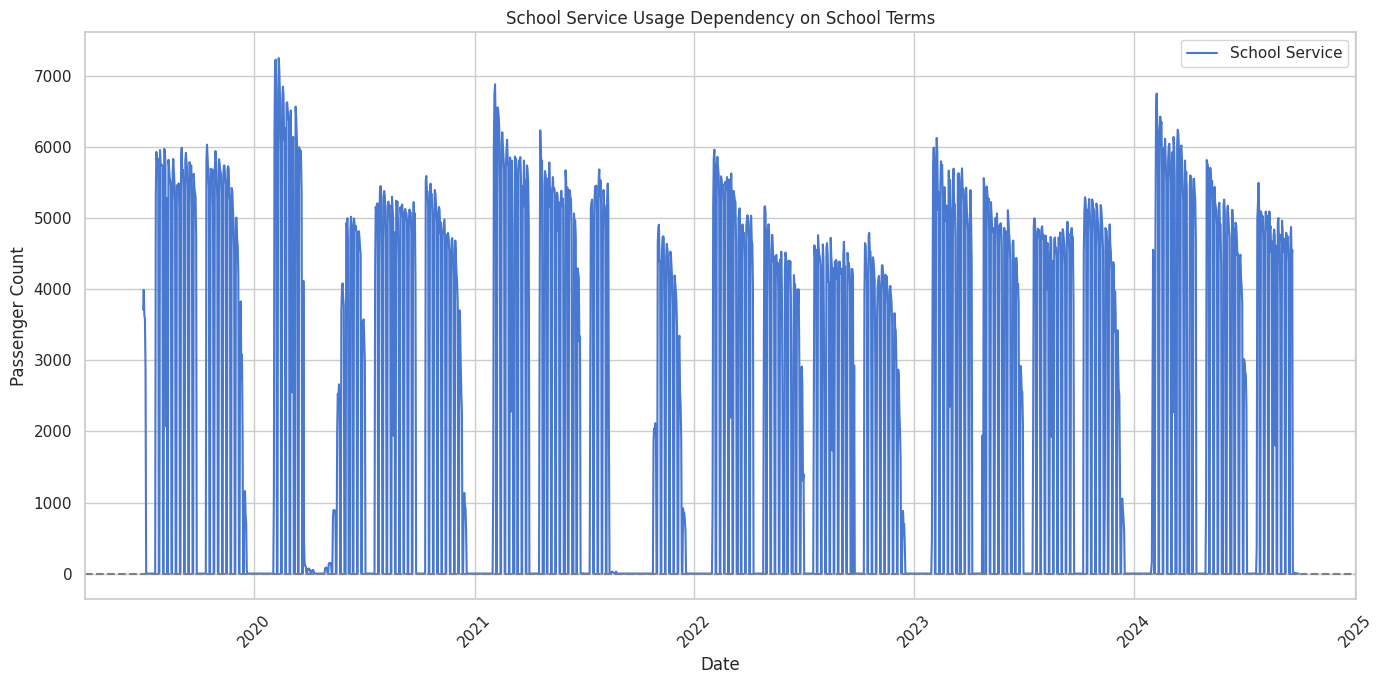

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='School', label='School Service')
plt.axhline(0, linestyle='--', color='gray')
plt.title("School Service Usage Dependency on School Terms")
plt.ylabel("Passenger Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

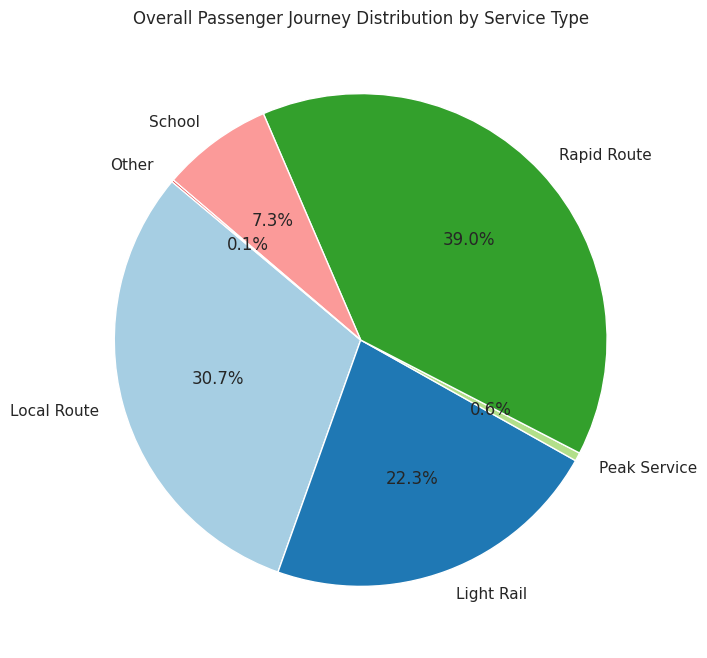

In [ ]:
import matplotlib.pyplot as plt

service_sums = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()

plt.figure(figsize=(8,8))
plt.pie(service_sums, labels=service_sums.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Overall Passenger Journey Distribution by Service Type")
plt.show()


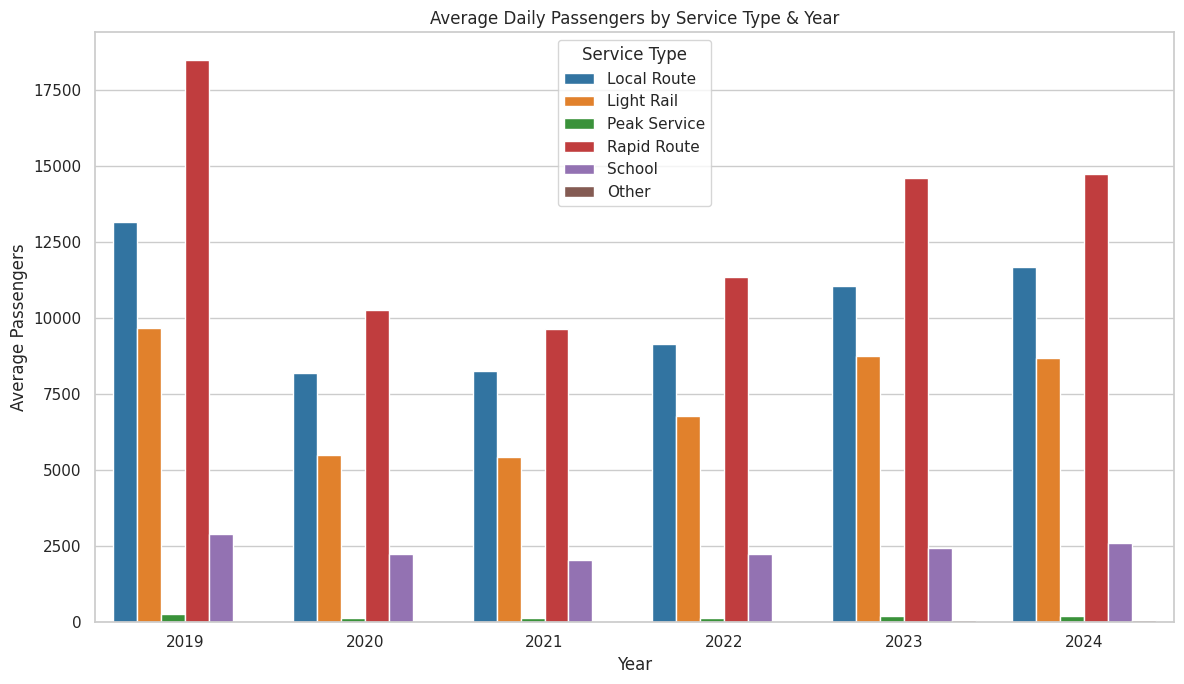

In [ ]:
import seaborn as sns

df['Year'] = df['Date'].dt.year

avg_per_year = df.groupby('Year')[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].mean().reset_index()

avg_melt = avg_per_year.melt(id_vars='Year', var_name='Service', value_name='Avg Passengers')

plt.figure(figsize=(12,7))
sns.barplot(data=avg_melt, x='Year', y='Avg Passengers', hue='Service', palette='tab10')
plt.title("Average Daily Passengers by Service Type & Year")
plt.ylabel("Average Passengers")
plt.xlabel("Year")
plt.legend(title='Service Type')
plt.tight_layout()
plt.show()


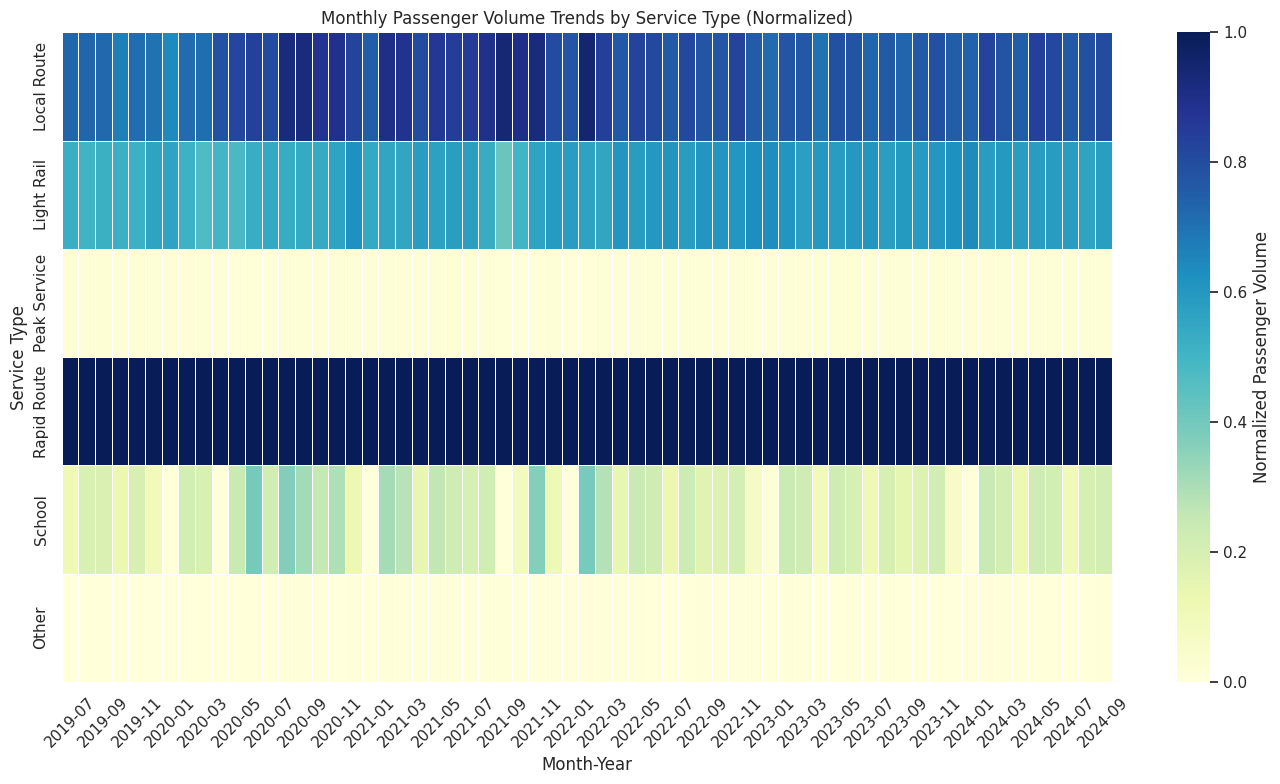

In [ ]:
df['Month_Year'] = df['Date'].dt.to_period('M')

monthly_sum = df.groupby('Month_Year')[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()

monthly_norm = monthly_sum.div(monthly_sum.max(axis=1), axis=0)

plt.figure(figsize=(14,8))
sns.heatmap(monthly_norm.T, cmap='YlGnBu', cbar_kws={'label': 'Normalized Passenger Volume'}, linewidths=.5)
plt.title("Monthly Passenger Volume Trends by Service Type (Normalized)")
plt.xlabel("Month-Year")
plt.ylabel("Service Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
